# 점진적 학습 종류
* 기존 데이터에 새로운 데이터를 추가하여 매일 재훈련
* 새로운 데이터 추가 시 기존 데이터 일부를 제거(크기 유지)
* 기존 훈련 모델을 유지하고, 새로운 데이터에 대해 추가 훈련 (점진적 학습)

# 경사 하강법
* 확률적 경사 하강법 : 무작위로 1개씩 샘플 선택
* 미니배치 경사 하강법 : 무작위로 몇 개씩 샘플 선택
* 배치 경사 하강법 : 전체 샘플 선택

# 확률적 경사 하강법 (SGD)
* 점진적 학습 알고리즘
* 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표

# Epoch
* SGD에서 훈련 셋을 한 번 모두 사용하는 과정

# 손실 함수 (Loss function)
* 엉터리인지 측정하는 기준
* 값이 작을수록 우수
* 비용 함수라고도 함
* 경사 하강법을 적용하기 위해서는 손실 함수 값이 연속적이어야함
* 미분 가능해야함
* 로지스틱 회귀 모델의 확률 출력을 통해 연속적인 손실 함수 구성

## 분류
* cross-ectropy loss function
* Binary cross-entroy, Categorical cross-entropy

## 회귀
* mean absolute error MAE
* mean squared error MSE
* root mean square error RMSE

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

로지스틱 손실 함수 그래프

<ipython-input-5-7c403eaa7753>:3: RuntimeWarning: divide by zero encountered in log10
  z = -(y * np.log10(p) + (1 - y) * np.log10(1 - p))


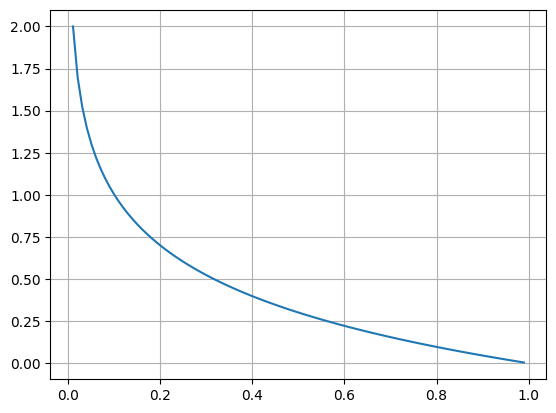

In [5]:
y = 1
p = np.arange(0, 1, 0.01)
z = -(y * np.log10(p) + (1 - y) * np.log10(1 - p))
plt.grid(True)
plt.plot(p, z)
plt.show()

<ipython-input-7-386f98a2aca1>:3: RuntimeWarning: divide by zero encountered in log10
  z = -(y * np.log10(p) + (1 - y) * np.log10(1 - p))
<ipython-input-7-386f98a2aca1>:3: RuntimeWarning: invalid value encountered in multiply
  z = -(y * np.log10(p) + (1 - y) * np.log10(1 - p))


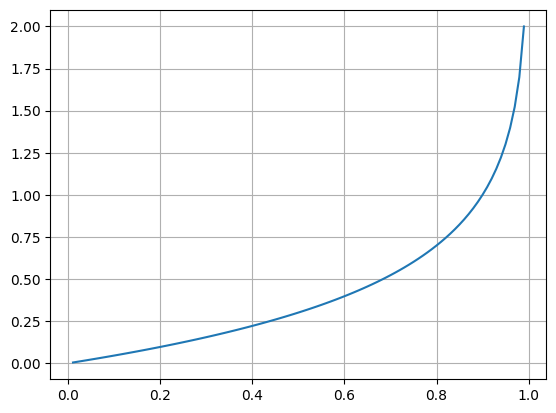

In [7]:
y = 0
p = np.arange(0, 1, 0.01)
z = -(y * np.log10(p) + (1 - y) * np.log10(1 - p))
plt.grid(True)
plt.plot(p, z)
plt.show()

# 실습

##데이터 준비

In [15]:
fish = pd.read_csv("https://bit.ly/fish_csv_data")
print(fish.shape)
fish.head()

(159, 6)
Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [21]:
fish_input = fish[fish.columns.to_numpy()[1:]].to_numpy()
fish_target = fish["Species"].to_numpy()
print(fish_input.shape)
print(fish_target.shape)
print(fish_input[:5])
print(fish_target[:5])

(159, 5)
(159,)
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [29]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_input,
    fish_target,
    random_state = 42
    )


In [30]:
ss = StandardScaler()
ss.fit(train_input, train_target)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 경사 하강법 분류

In [36]:
sc = SGDClassifier(loss = "log_loss",random_state = 42)

sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


추가학습

In [37]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.907563025210084
0.925


Epoch 횟수에 따라 과소적합 또는 과대적합이 될 수 있다.   
적절한 에포크 횟수를 찾아야함

##SGD 사용 모델 그래프

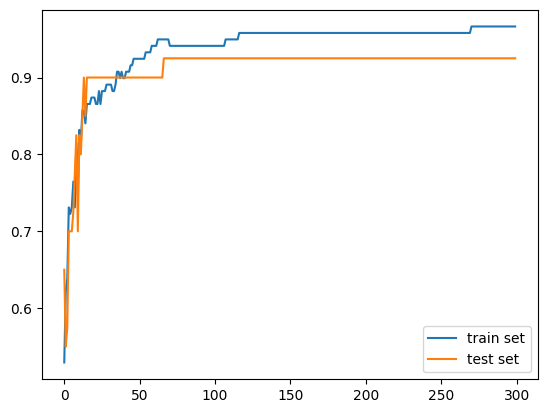

In [40]:
sc2 = SGDClassifier(loss = "log_loss", random_state = 42)
train_score, test_score = [], []
classes = np.unique(train_target)

for _ in range(300):
  sc2.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc2.score(train_scaled, train_target))
  test_score.append(sc2.score(test_scaled, test_target))

plt.plot(train_score, label = 'train set')
plt.plot(test_score, label = 'test set')
plt.legend()
plt.show()

In [42]:
sc3 = SGDClassifier(loss = "log_loss", max_iter = 100, tol = None, random_state = 42)
sc3.fit(train_scaled, train_target)
print(sc3.score(train_scaled, train_target))
print(sc3.score(test_scaled, test_target))

0.957983193277311
0.925
